In [35]:

import pandas as pd
from data_fetch import api_request
from datetime import date, timedelta


TICKERS = ["SBER", "VTBR",   "SIBN",        "LKOH",    "ROSN",    "YNDX",    "YDEX", "VKCO"]
NAME    = ["Сбер", "ВТБ", "Газпром Нефть", "Лукойл", "Роснефть", "Яндекс", "Яндекс 2", "ВК"]

#Вычисляем вчерашнюю дату
yesterday = date.today() - timedelta(days=1)
YEST = yesterday.isoformat()

# цена закрытия для каждой акции с 1 января 2020 года до вчерашнего дня
close_series = {
    t: api_request(t, "2020-01-01", YEST)["close"]
    for t in TICKERS
}
prices = pd.concat(close_series, axis = 1)
prices.columns.name = "Ticker"
prices.index.name   = "Date"



## Выводим цену акций в момент закрытия торгов во вчерашний день

In [36]:

display(prices.loc[[YEST]])


Ticker,SBER,VTBR,SIBN,LKOH,ROSN,YNDX,YDEX,VKCO
Date,,,,,,,,
2025-05-27,298.7,93.59,522.1,6486.0,413.65,NaN,3992.5,256.7


## Давайте посмотрим как менялась цена акций в  банковском секторе за последние 5 лет на примере СБЕРА и ВТБ

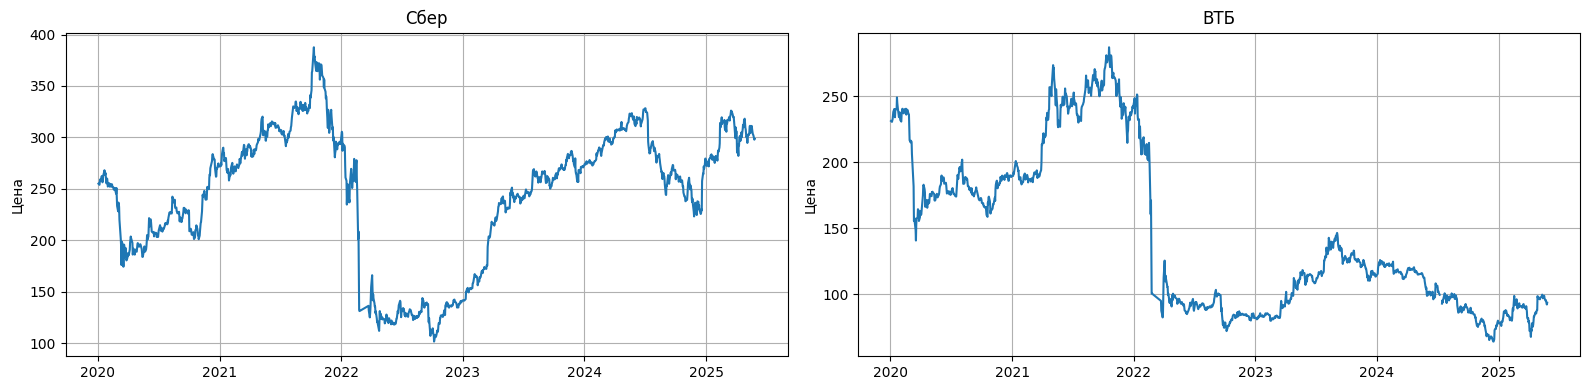

In [37]:
import math
import matplotlib.pyplot as plt


n = len(TICKERS[:2])
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows), sharex=True)
axes = axes.flatten()

for ax, ticker, name in zip(axes, TICKERS[:2], NAME[:2]):
    ax.plot(prices.index, prices[ticker])
    ax.set_title(name)
    ax.set_ylabel("Цена")
    ax.grid(True)


plt.tight_layout()
plt.show()


## Посмотрим на рынок нефти на примере Газпрома, Лукойла и Роснефти

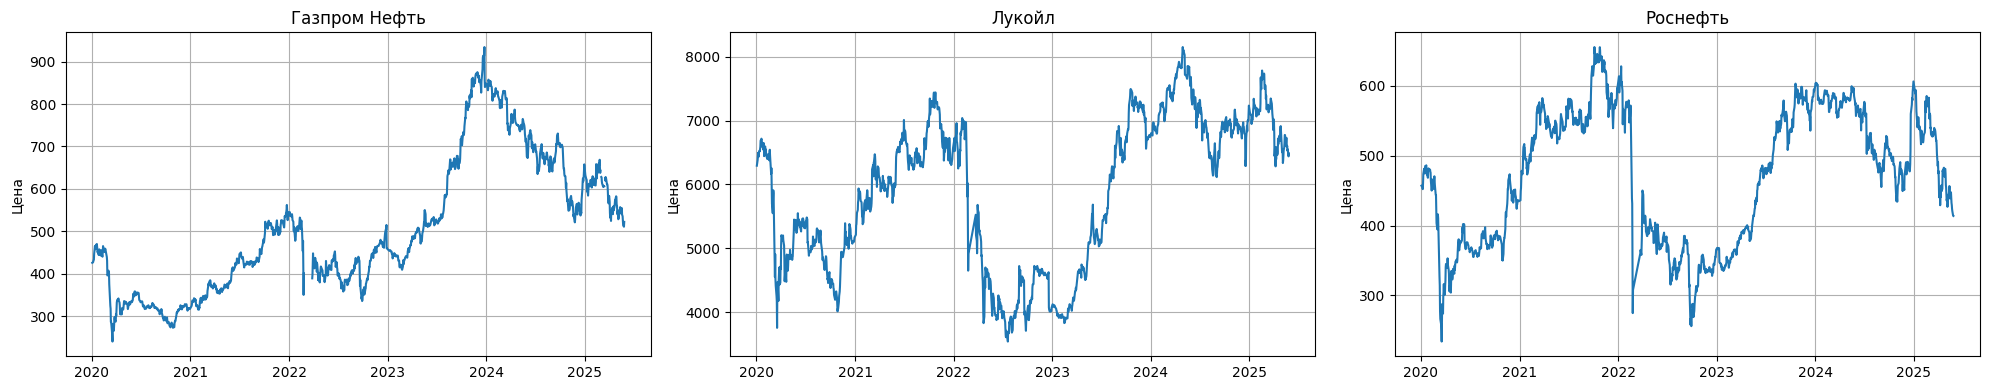

In [38]:
n = len(TICKERS[2:5])
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), sharex=True)
axes = axes.flatten()

for ax, ticker, name in zip(axes, TICKERS[2:5], NAME[2:5]):
    ax.plot(prices.index, prices[ticker])
    ax.set_title(name)
    ax.set_ylabel("Цена")
    ax.grid(True)


plt.tight_layout()
plt.show()

## Посмотрим на акции в IT сфере по Яндексу и ВК
Яндекс в 2024 сменил свой тикер на мосбирже, поэтому рассмотрим два графика у Яндекса  
А по акциям ВК до 2022 года Мосбиржа не даёт данные

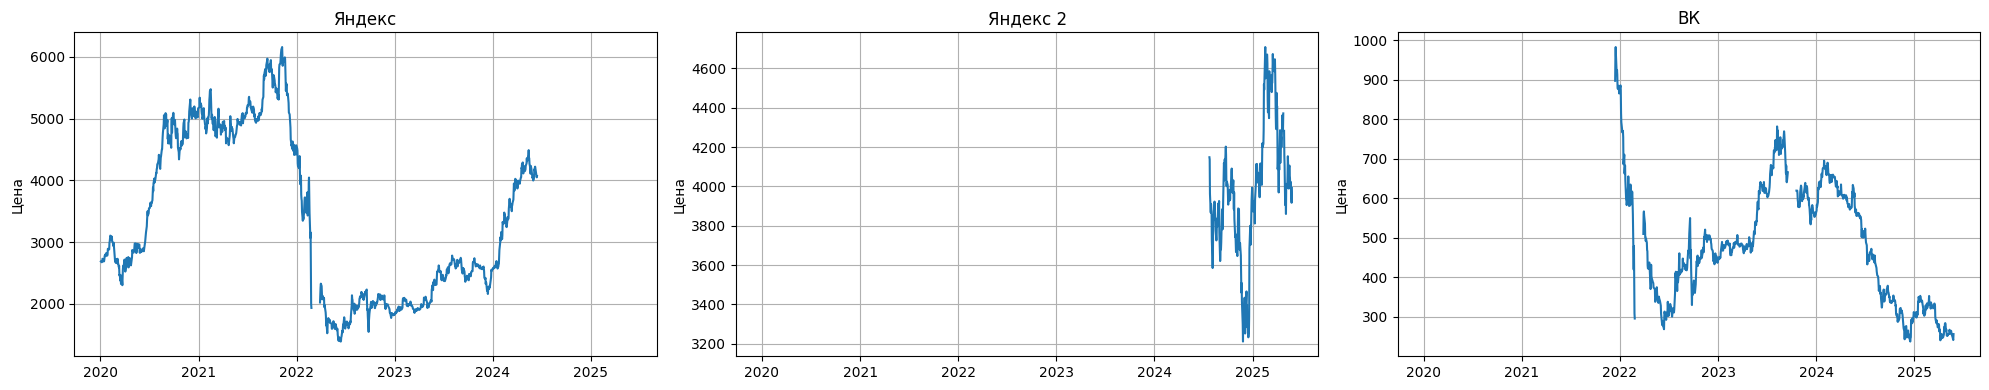

In [39]:
n = len(TICKERS[5:])
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), sharex=True)
axes = axes.flatten()

for ax, ticker, name in zip(axes, TICKERS[5:], NAME[5:]):
    ax.plot(prices.index, prices[ticker])
    ax.set_title(name)
    ax.set_ylabel("Цена")
    ax.grid(True)


plt.tight_layout()
plt.show()